In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def cubicSpline(x, y, xp):
    delX = np.diff(x)
    delY = np.diff(y)
    n = len(x)

    A = np.zeros((n - 2, n - 2))
    B = np.zeros(n - 2)

    for i in range(n - 2):
        A[i][i] = 2 * (delX[i] + delX[i + 1])
        if i > 0:
            A[i][i - 1] = delX[i]
        if i < n - 3:
            A[i][i + 1] = delX[i + 1]

        B[i] = 6 * ((delY[i + 1] / delX[i + 1]) - (delY[i] / delX[i]))

    M_internal = np.linalg.solve(A, B)
    M = np.concatenate(([0], M_internal, [0]))

    index = np.searchsorted(x, xp) - 1
    index = max(0, min(index, len(x) - 2))  # Clamp to [0, len(x) - 2]

    h = delX[index]
    a = M[index] * (x[index + 1] - xp) ** 3 / (6 * h)
    b = M[index + 1] * (xp - x[index]) ** 3 / (6 * h)
    c = (y[index] - M[index] * h**2 / 6) * (x[index + 1] - xp) / h
    d = (y[index + 1] - M[index + 1] * h**2 / 6) * (xp - x[index]) / h

    return a + b + c + d


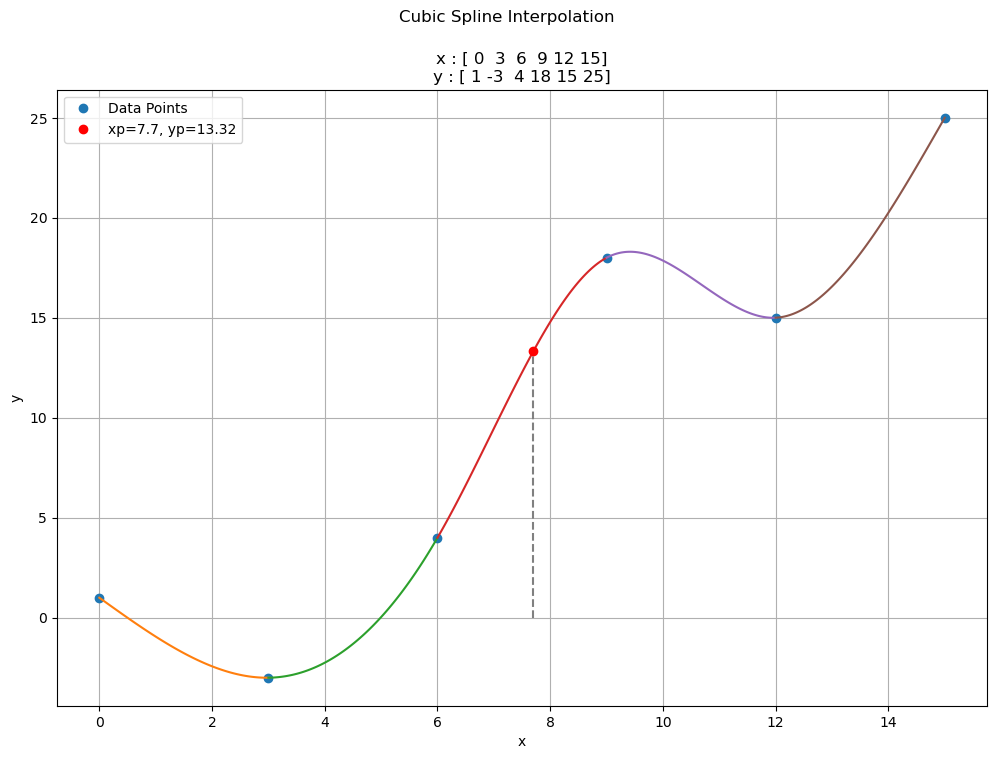

In [115]:
x = np.array(np.arange(0, 18, 3))
y = np.array([a*2 + np.random.randint(-9, 9) for a in x])
xp = 7.7
approx = cubicSpline(x, y, xp)

plt.figure(figsize=(12, 8))

# Original points
plt.plot(x, y, 'o', label="Data Points")

# Spline segments
for i in range(len(x) - 1):
    xs = np.linspace(x[i], x[i + 1], 100)
    ys = [cubicSpline(x, y, xi) for xi in xs]
    plt.plot(xs, ys)

# Mark xp
plt.vlines(xp, 0, approx, linestyle='--', color='grey')
plt.plot(xp, approx, 'ro', label=f"xp={xp}, yp={approx:.2f}")

plt.title(f"x : {x}\ny : {y}")
plt.suptitle("Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


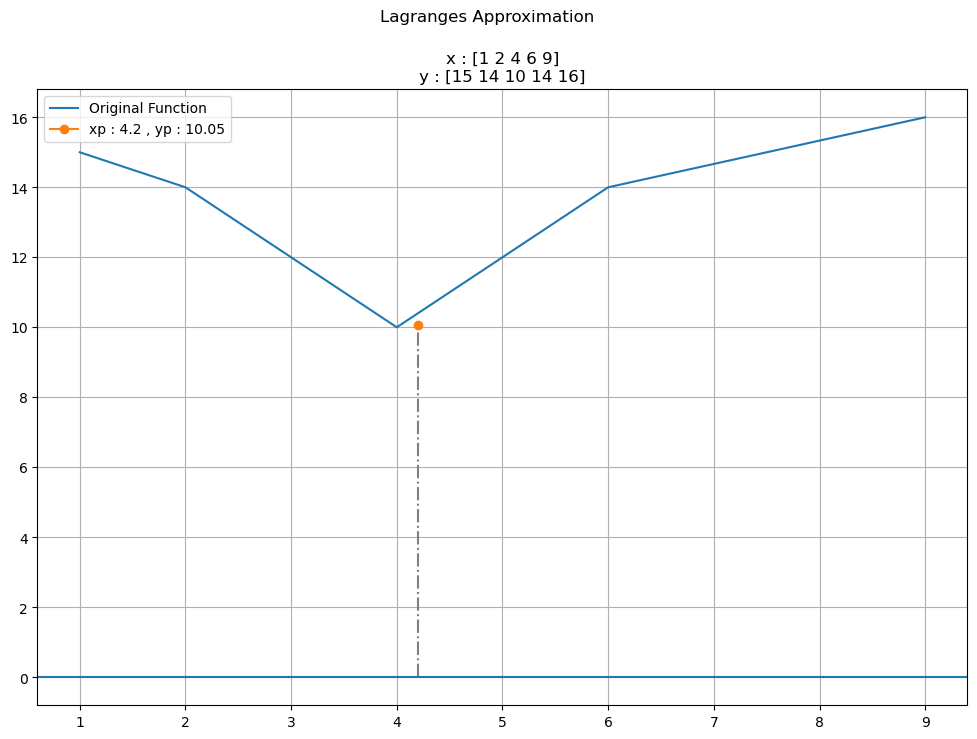

In [72]:
plt.figure(figsize = (12, 8))
plt.plot(x, y,label = "Original Function")
plt.vlines(xp, 0, approx, linestyle = '-.', color = 'grey', )
plt.plot(xp, approx, marker = 'o', label = f"xp : {xp} , yp : {approx:.2f}")
plt.axhline(0)
plt.legend()
plt.title(f"x : {x}\ny : {y}")
plt.suptitle("Lagranges Approximation")

plt.grid()